# Clustering con K-Means
## Task 3: Uribe Aldo

In [74]:
import pandas as pd
df = pd.read_csv('Mall_customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [75]:
# No utilizamos identificadores para la clusterización
# La variable que representa a todos los datos del data set
# DNI, Código Central Interno
df_1 = df.iloc[:, 1:]
df_1.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [76]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Genre                   200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


### 1. Clusterización con 3 variables

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
 
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D

X = df_1.iloc[:, 1:4].values
pd.DataFrame(X).head()
# Índice 0: Age (years)
# Índice 1: Annual Income (k$)
# Índice 2: Spending Score (1-100)

,0,1,2
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [84]:
# Algoritmo de Clusterización por K-Means
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 4, init = "k-means++",
                max_iter = 300, n_init = 10, random_state = 0)

kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [85]:
kmeans.inertia_ #WCSS -> n=4 -> 73,679.7

104366.15145556198

In [86]:
#Predictive centroids for 3 parameters
kmeans.cluster_centers_

array([[44.89473684, 48.70526316, 42.63157895],
       [24.82142857, 28.71428571, 74.25      ],
       [32.69230769, 86.53846154, 82.12820513],
       [40.39473684, 87.        , 18.63157895]])

In [87]:
cluster_4 = kmeans.fit_predict(X)
cluster_4

array([1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2])

In [88]:
# Índice 0: Age (years)
# Índice 1: Annual Income (k$)
# Índice 2: Spending Score (1-100)
X[cluster_4 == 0, 0]

array([20, 31, 35, 64, 67, 58, 37, 35, 52, 35, 46, 54, 45, 40, 60, 53, 49,
       42, 36, 65, 48, 49, 50, 27, 29, 31, 49, 31, 59, 50, 47, 51, 69, 27,
       53, 70, 67, 54, 63, 43, 68, 32, 70, 47, 60, 60, 59, 26, 45, 40, 23,
       49, 57, 38, 67, 46, 21, 48, 55, 22, 34, 50, 68, 18, 48, 40, 32, 24,
       47, 27, 48, 20, 23, 49, 67, 26, 49, 21, 66, 54, 68, 66, 65, 19, 38,
       19, 18, 19, 63, 49, 51, 50, 27, 38, 40], dtype=int64)

Text(0.5, 0, 'Spend_Score')

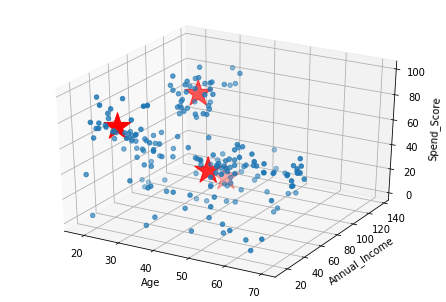

In [89]:
# Índice 0: Age (years)
# Índice 1: Annual Income (k$)
# Índice 2: Spending Score (1-100)
# Predicting the clusters
labels = kmeans.predict(X)
# Getting the cluster centers
C = kmeans.cluster_centers_
for i in labels:
    asignar.append(colores[i])
#Plotting
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2],s=20)
ax.scatter(C[:, 0], C[:, 1], C[:, 2],color='red', marker='*', s=800)
#Legend:
ax.set_xlabel('Age')
ax.set_ylabel('Annual_Income')
ax.set_zlabel('Spend_Score')

Text(0.5, 0, 'Spend_Score')

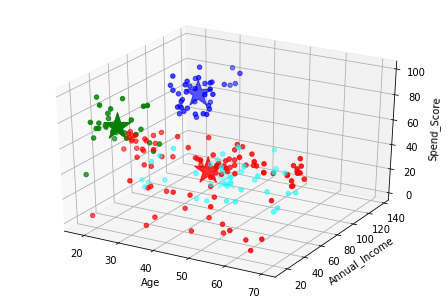

In [70]:
# Índice 0: Age (years)
# Índice 1: Annual Income (k$)
# Índice 2: Spending Score (1-100)
# Predicting the clusters
labels = kmeans.predict(X)
# Getting the cluster centers
C = kmeans.cluster_centers_
colores=['red','green','blue','cyan']
asignar=[]
for i in labels:
    asignar.append(colores[i])
#Plotting
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar,s=20)
ax.scatter(C[:, 0], C[:, 1], C[:, 2],c=colores, marker='*', s=800)
#Legend:
ax.set_xlabel('Age')
ax.set_ylabel('Annual_Income')
ax.set_zlabel('Spend_Score')

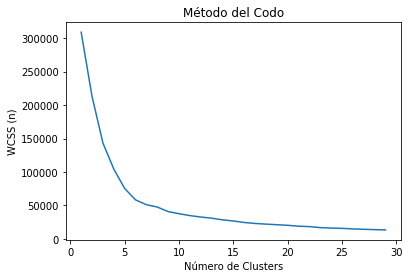

In [90]:
wcss = [] # Aquí almacenaremos el resultado de la inercia para cada "n"
n = 30    # Número de grupos que vamos a probar

for i in range(1, n):
    kmeans = KMeans(n_clusters = i, init = "k-means++",
                max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, n), wcss)
plt.title('Método del Codo')
plt.xlabel('Número de Clusters')
plt.ylabel('WCSS (n)')
plt.show()

In [91]:
# Algoritmo de Clusterización por K-Means (Reconociendo el 'óptimo')
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 5, init = "k-means++",
                max_iter = 300, n_init = 10, random_state = 0)
kmeans.fit(X)
cluster_5 = kmeans.fit_predict(X)
cluster_5

array([0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 2, 1, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 1, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2])

In [93]:
# Índice 0: Age (years)
# Índice 1: Annual Income (k$)
# Índice 2: Spending Score (1-100)
X[cluster_5==0,0]

array([19, 20, 31, 35, 64, 67, 58, 37, 35, 52, 35, 46, 54, 45, 40, 60, 53,
       49, 42, 36, 65, 48, 49], dtype=int64)

Text(0.5, 0, 'Spend_Score')

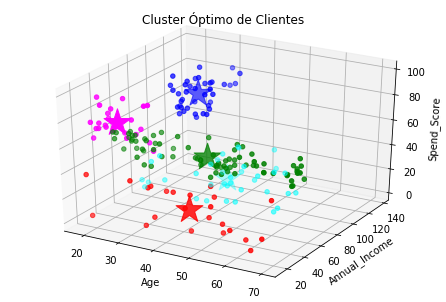

In [122]:
# Índice 0: Age (years)
# Índice 1: Annual Income (k$)
# Índice 2: Spending Score (1-100)
# Predicting the clusters
labels = kmeans.predict(X)
# Getting the cluster centers
C = kmeans.cluster_centers_
text=['Conservadores','Riesgosos','Público Objetivo','No Objetivo','Potencial']
colores=['red','green','blue','cyan','magenta']
asignar_color=[]
for i in labels:
    asignar_color.append(colores[i])
#Plotting
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2],label=asignar_text, c=asignar_color,s=20)
ax.scatter(C[:, 0], C[:, 1], C[:, 2],c=colores, marker='*', s=800)
#Legend:
plt.title('Cluster Óptimo de Clientes')
ax.set_xlabel('Age')
ax.set_ylabel('Annual_Income')
ax.set_zlabel('Spend_Score')


Text(0.5, 0, 'Spend_Score')

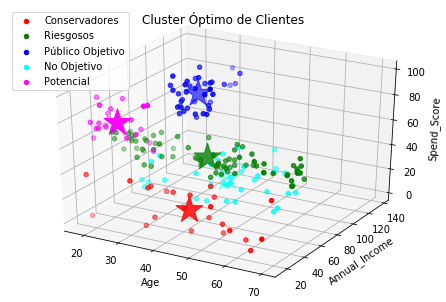

In [128]:
# Índice 0: Age (years)
# Índice 1: Annual Income (k$)
# Índice 2: Spending Score (1-100)
# Predicting the clusters
labels = kmeans.predict(X)
# Getting the cluster centers
C = kmeans.cluster_centers_
colores=['red','green','blue','cyan','magenta']
asignar_color=[]
for i in labels:
    asignar_color.append(colores[i])
#Plotting
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[cluster_5 == 0, 0], X[cluster_5 == 0, 1],X[cluster_5 == 0, 2], s = 20, c = 'red', label = 'Conservadores')
ax.scatter(X[cluster_5 == 1, 0], X[cluster_5 == 1, 1],X[cluster_5 == 1, 2], s = 20, c = 'green', label = 'Riesgosos')
ax.scatter(X[cluster_5 == 2, 0], X[cluster_5 == 2, 1],X[cluster_5 == 2, 2], s = 20, c = 'blue', label = 'Público Objetivo')
ax.scatter(X[cluster_5 == 3, 0], X[cluster_5 == 3, 1],X[cluster_5 == 3, 2], s = 20, c = 'cyan', label = 'No Objetivo')
ax.scatter(X[cluster_5 == 4, 0], X[cluster_5 == 4, 1],X[cluster_5 == 4, 2], s = 20, c = 'magenta', label = 'Potencial')
ax.scatter(C[:, 0], C[:, 1], C[:, 2],c=colores, marker='*', s=800)
ax.legend(loc='upper left')
#Legend:
plt.title('Cluster Óptimo de Clientes')
ax.set_xlabel('Age')
ax.set_ylabel('Annual_Income')
ax.set_zlabel('Spend_Score')